In [2]:
import pandas as pd
import re 
from Levenshtein import distance as lev
import urllib.parse

In [6]:
# df = pd.read_csv('word_lists/acter/fr_en.csv', delimiter='\t', header=None)
df = pd.read_csv('word_lists/silvanus/nl_fr_bootstrap.csv')

In [8]:
df

,nl,fr
0,Hartfalen,Insuffisance_cardiaque_chez_l%27humain
1,Pulmonale_hypertensie,Hypertension_art%C3%A9rielle_pulmonaire
2,Frank-Starlingmechanisme,Loi_de_Starling
3,Botziekte_van_Paget,Maladie_osseuse_de_Paget
4,Medische_diagnose,Diagnostic_(m%C3%A9decine)
...,...,...
1877,Scandiumgroep,Groupe_3_du_tableau_p%C3%A9riodique
1878,Diatomee%C3%ABn,Bacillariophyta
1879,Kerstroos_(Helleborus),Helleborus_niger
1880,Veneuze_insuffici%C3%ABntie,Insuffisance_veineuse


In [9]:
# df=pd.DataFrame(df.values, columns = ["source", "target"])
df.rename(columns={'nl': 'source', 'fr' : 'target'}, inplace=True)
df = df[['source','target']]

In [10]:
df['target'] = df['target'].apply(lambda x : x.replace('_',' '))

In [11]:
df['source'] = df['source'].apply(lambda x: re.sub("[\(\[].*?[\)\]]", "", x))
df['target'] = df['target'].apply(lambda x: re.sub("[\(\[].*?[\)\]]", "", x))

In [12]:
df['source_words'] = df['source'].str.split().str.len()
df['target_words'] = df['target'].str.split().str.len()

In [13]:
def title_parse(title):
    title = urllib.parse.unquote(title)
    return title
df['source']= df.source.apply(title_parse)
df['target']= df.target.apply(title_parse)

In [14]:
df

,source,target,source_words,target_words
0,Hartfalen,Insuffisance cardiaque chez l'humain,1,4
1,Pulmonale_hypertensie,Hypertension artérielle pulmonaire,1,3
2,Frank-Starlingmechanisme,Loi de Starling,1,3
3,Botziekte_van_Paget,Maladie osseuse de Paget,1,4
4,Medische_diagnose,Diagnostic,1,1
...,...,...,...,...
1877,Scandiumgroep,Groupe 3 du tableau périodique,1,5
1878,Diatomeeën,Bacillariophyta,1,1
1879,Kerstroos_,Helleborus niger,1,2
1880,Veneuze_insufficiëntie,Insuffisance veineuse,1,2


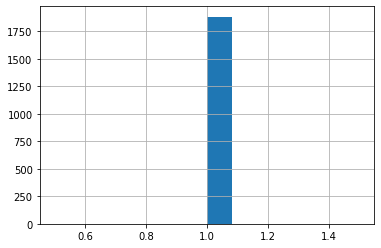

In [15]:
hist = df['source_words'].hist(bins=12)

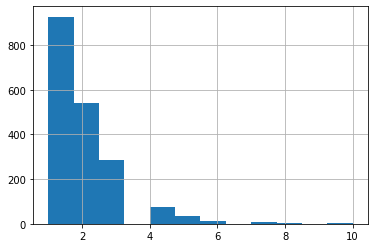

In [16]:
hist = df['target_words'].hist(bins=12)

In [17]:
df['compare'] = df.apply(lambda x : 1 if x['source_words'] == x['target_words'] else 2, axis=1)


In [18]:
df['distance'] = df.apply(lambda x : lev(str(x['source']),str(x['target'])), axis=1)
df['distance'] = df['distance'].apply(lambda x : 20 if x>20 else x)

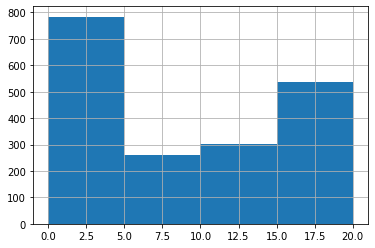

In [19]:
hist = df['distance'].hist(bins=4)

In [20]:
lev(str(df['source_words'][0]),str(df['target_words'][0]))

1

In [21]:
df

,source,target,source_words,target_words,compare,distance
0,Hartfalen,Insuffisance cardiaque chez l'humain,1,4,2,20
1,Pulmonale_hypertensie,Hypertension artérielle pulmonaire,1,3,2,20
2,Frank-Starlingmechanisme,Loi de Starling,1,3,2,17
3,Botziekte_van_Paget,Maladie osseuse de Paget,1,4,2,16
4,Medische_diagnose,Diagnostic,1,1,1,14
...,...,...,...,...,...,...
1877,Scandiumgroep,Groupe 3 du tableau périodique,1,5,2,20
1878,Diatomeeën,Bacillariophyta,1,1,1,12
1879,Kerstroos_,Helleborus niger,1,2,2,13
1880,Veneuze_insufficiëntie,Insuffisance veineuse,1,2,2,18


In [22]:
identical_df = df.loc[df['source_words'] == 1]
identical_df = df.loc[df['target_words'] == 1]

In [17]:
identical_df.to_csv('heart_failure_en_fr.csv')

In [23]:
len(set(identical_df['target']))

925

In [24]:
word_list = []
for x in df[1:].iterrows():
    print(x[1])
    if x[1]['source_words'] == 1 and x[1]['target_words'] == 1:
        word_list.append('{}\t{}'.format(x[1]['source'].lower(),x[1]['target'].lower()))

source                       Pulmonale_hypertensie
target          Hypertension artérielle pulmonaire
source_words                                     1
target_words                                     3
compare                                          2
distance                                        20
Name: 1, dtype: object
source          Frank-Starlingmechanisme
target                   Loi de Starling
source_words                           1
target_words                           3
compare                                2
distance                              17
Name: 2, dtype: object
source               Botziekte_van_Paget
target          Maladie osseuse de Paget
source_words                           1
target_words                           4
compare                                2
distance                              16
Name: 3, dtype: object
source          Medische_diagnose
target                Diagnostic 
source_words                    1
target_words                   

Name: 415, dtype: object
source                 Duikerklok
target          Cloche de plongée
source_words                    1
target_words                    3
compare                         2
distance                       14
Name: 416, dtype: object
source          Alchemie
target          Alchimie
source_words           1
target_words           1
compare                1
distance               1
Name: 417, dtype: object
source             Recursie
target          Récursivité
source_words              1
target_words              1
compare                   1
distance                  5
Name: 418, dtype: object
source                                              Normaalwaarde
target          Valeurs de référence pour les principaux tests...
source_words                                                    1
target_words                                                    8
compare                                                         2
distance                                        

Name: 814, dtype: object
source          Versterkte_wijn
target                 Vin muté
source_words                  1
target_words                  2
compare                       2
distance                     13
Name: 815, dtype: object
source           Schildklierhormonen
target          Hormone thyroïdienne
source_words                       1
target_words                       2
compare                            2
distance                          18
Name: 816, dtype: object
source          Vergif
target          Poison
source_words         1
target_words         1
compare              1
distance             6
Name: 817, dtype: object
source          Kleine_hersenen
target                 Cervelet
source_words                  1
target_words                  1
compare                       1
distance                     11
Name: 818, dtype: object
source          Claudius_Galenus
target             Claude Galien
source_words                   1
target_words                   2

Name: 1202, dtype: object
source          Lucianus_van_Samosata
target             Lucien de Samosate
source_words                        1
target_words                        3
compare                             2
distance                            9
Name: 1203, dtype: object
source          Middenplatonisme
target          Moyen-platonisme
source_words                   1
target_words                   1
compare                        1
distance                       4
Name: 1204, dtype: object
source          Herbert_Spencer
target          Herbert Spencer
source_words                  1
target_words                  2
compare                       2
distance                      1
Name: 1205, dtype: object
source          Mediastinum
target            Médiastin
source_words              1
target_words              1
compare                   1
distance                  3
Name: 1206, dtype: object
source          Onderzoeksjournalistiek
target            Journalisme d'enquête
sour

Name: 1565, dtype: object
source            Salpeterzuur
target          Acide nitrique
source_words                 1
target_words                 2
compare                      2
distance                    11
Name: 1566, dtype: object
source             Vetweefsel
target          Tissu adipeux
source_words                1
target_words                2
compare                     2
distance                   12
Name: 1567, dtype: object
source          Analytische_machine
target           Machine analytique
source_words                      1
target_words                      2
compare                           2
distance                         16
Name: 1568, dtype: object
source                 Monoklien_kristalstelsel
target          Système cristallin monoclinique
source_words                                  1
target_words                                  3
compare                                       2
distance                                     20
Name: 1569, dtype: object


In [25]:
import random
random.shuffle(word_list)

In [26]:
with open('word_lists/silvanus/heart_failure_nl_fr.txt', 'w') as the_file:
    for line in word_list:
        the_file.write('{}\n'.format(line))

In [23]:
len(word_list)

2702

In [24]:
word_list

['auriculo-ventriculaires\tatrioventricular',
 'québec\tquébec',
 'métabolisme\tmetabolism',
 'peropératoires\tperioperative',
 'pathologiques\tpathological',
 'congénital\tcongenital',
 'organique\torganic',
 'angine\tangina',
 'sensibilité\tsensitivity',
 'parasympathique\tparasympathetic',
 'aortique\taortic',
 'congénitaux\tcongenital',
 'cérébraux\tcerebral',
 'cardiaques\tcardiac',
 'hypertensions\thypertension',
 'diagnostiqués\tdiagnosed',
 'mitrales\tmitral',
 'apex\tapex',
 'métaboliques\tmetabolic',
 'aldostérone\taldosterone',
 'collagène\tcollagen',
 'diagnostiquée\tdiagnosed',
 'pronostique\tprognostic',
 'pouls\tpulse',
 'chirurgien\tsurgeons',
 'implanté\timplanted',
 'significatif\tsignificant',
 'sténoses\tstenosis',
 'arthrites\tarthritis',
 'électrolytes\telectrolytes',
 'adénovirus\tadenovirus',
 'dysfonctionnement\tdysfunction',
 'injection\tinjections',
 'hypertrophique\thypertrophic',
 'placebo\tplacebo',
 'cerveau\tbrain',
 'calcineurine\tcalcineurin',
 'santé\

In [25]:
words = [j.split('\t')[0] for j in word_list]

['perfusie',
 'cardiaal',
 'resuscitatie',
 'framingham',
 'angiotensine',
 'infectie',
 'coronaire',
 'cardiale',
 'endotheline',
 'erfelijke',
 'mitralis',
 'diabetische',
 'compliance',
 'cardiogene',
 'spironolacton',
 'diagnostische',
 'symptomatische',
 'cytotoxisch',
 'hypertensie',
 'pulmonale',
 'compliantie',
 'r',
 'pioglitazon',
 'donoren',
 'paradigm-hf',
 'renaal',
 'ß2-receptoren',
 'nyha',
 'veneuze',
 'bisoprolol',
 'myocardiale',
 'chemotherapie',
 'adrenaline',
 'sodium',
 'natriuretisch',
 'chronische',
 'gedilateerd',
 'natriuretische',
 'diuretisch',
 'dysfunctie',
 'inotrope',
 'symptomatisch',
 'vasculaire',
 'parasympathische',
 'organen',
 'cholesterol',
 'hyperlipidemie',
 'etiologisch',
 'vasodilaterende',
 'systolisch',
 'contractiele',
 'immuunhistochemisch',
 'terminaal',
 'kalium',
 'atrioventriculair',
 'ischemische',
 'charm',
 'orgaan',
 'bèta-2-adrenoceptor',
 'hypoxie',
 'röntgenfoto',
 'geneesmiddelvoorschriften',
 'elektrolyten',
 'apoptosis',
 'p

In [22]:
with open('word_lists/silvanus/heart_failure_en_nl.txt') as f:
    lines = f.readlines()

In [26]:
for line in lines:
    if line.split('\t')[0] in words:
        print(line)

furosemide	furosemide

cholesterol	cholesterol

genotype	genotype

creatinine	creatinine

apoptosis	apoptose

sodium	natrium

placebo	placebo 

spironolactone	spironolacton

apoptosis	apoptose

inotrope	inotropie

cholesterol	cholesterol

adrenaline	adrenaline

inotrope	inotropie

spironolactone	spironolacton

apoptosis	apoptose



In [25]:
words = list(set(words))

In [ ]:
furosemide	furosemide

cholesterol	cholesterol

genotype	genotype

creatinine	creatinine

apoptosis	apoptose

sodium	natrium

placebo	placebo 

spironolactone	spironolacton

apoptosis	apoptose

inotrope	inotropie

adrenaline	adrenaline

inotrope	inotropie
